In [2]:
# azureml-core of version 1.0.72 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = 'e3d40f50-727b-419f-ae16-af0880e201e1'
resource_group = 'One'
workspace_name = '10daysofml'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='CatVsDog')
dataset.download(target_path='.', overwrite=True)

['/mnt/batch/tasks/shared/LS_root/mounts/clusters/daysofml/code/Users/RAGHAV.BANG/dataset.zip']

In [3]:
import os
import zipfile
local_zip = 'dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('')
zip_ref.close()

In [5]:
train_cat_dir = r"dataset\training_set\cats"
train_dog_dir = r"dataset\training_set\dogs"
validation_cat_dir = r"dataset\test_set\cats"
validation_dog_dir = r"dataset\test_set\dogs"

In [6]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory("dataset/training_set",
                                                    batch_size = 40,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

validation_generator =  test_datagen.flow_from_directory( "dataset/test_set",
                                                          batch_size  = 40,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [21]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [25]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_steps=50,
                              verbose=2)

WARNING - sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING - sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 - 273s - loss: 0.3867 - accuracy: 0.8455 - val_loss: 0.3426 - val_accuracy: 0.8460
Epoch 2/100
100/100 - 298s - loss: 0.3607 - accuracy: 0.8487 - val_loss: 0.3799 - val_accuracy: 0.8865
Epoch 3/100
100/100 - 223s - loss: 0.3766 - accuracy: 0.8450 - val_loss: 0.2266 - val_accuracy: 0.9060
Epoch 4/100
100/100 - 216s - loss: 0.3598 - accuracy: 0.8460 - val_loss: 0.4593 - val_accuracy: 0.8145
Epoch 5/100
100/100 - 215s - loss: 0.3572 - accuracy: 0.8520 - val_loss: 0.4708 - val_accuracy: 0.8065
Epoch 6/100
100/100 - 216s - loss: 0.3532 - accuracy: 0.8490 - val_loss: 0.2617 - val_accuracy: 0.8925
Epoch 7/100
100/100 - 215s - loss: 0.3525 - accuracy: 0.8485 - val_loss: 1.4981 - val_accuracy: 0.8390
Epoch 8/100
100/100 - 238s - loss: 0.3578 - accuracy: 0.8495 - val_loss: 0.3426 - val_accuracy: 0.8600
Epoch 9/100
100/100 - 215s - loss: 0.3715 - accuracy: 0.8480 - val_loss: 0.3917 - val_accuracy: 0.8445
Epoch 10/100
100/100 - 215s - 

Text(0.5, 1.0, 'Training and validation loss')

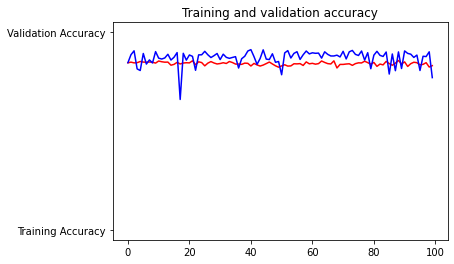

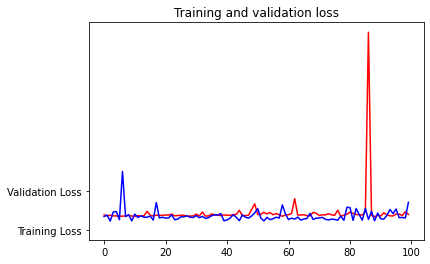

In [28]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 


plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')